### Importing the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from imbalanced import over_sampling, under_sampling
from helper import save_model, load_model

In [2]:
# Configuration
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', 500)

# Filter Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
def read_yaml_to_dict(file_path):
    """Reads a YAML file and returns its content as a dictionary."""
    import yaml
    try:
        with open(file_path, 'r') as file:
            data = yaml.safe_load(file)
        return data
    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
        return None
    except yaml.YAMLError as e:
        print(f"Error parsing YAML file: {e}")
        return None

In [4]:
features = read_yaml_to_dict("Modified Data/variable.yaml")
df = pd.read_csv("Modified Data/imputed_data.csv")

In [5]:
df.head()

,SEXVAR,_AGE80,_AGEG5YR,CVDINFR4,CVDCRHD4,CVDSTRK3,BPHIGH6,TOLDHI3,CHOLMED3,DIABETE4,CHCKDNY2,HAVARTH4,GENHLTH,PHYSHLTH,MENTHLTH,EXERANY2,STRENGTH,SMOKE100,USENOW3,ECIGNOW2,ALCDAY4,WEIGHT2,HEIGHT3,_BMI5
0,Female,80,Age 80 or older,No,No,No,Yes,No,No,Yes,No,No,Very good,30,30,No,0,No,Not at all,Never,0,172.0,5.250000,30.47
1,Female,80,Age 80 or older,No,No,No,Yes,Yes,Yes,No,No,Yes,Very good,30,30,Yes,0,No,Not at all,Never,0,132.0,4.750000,28.56
2,Female,80,Age 80 or older,No,No,No,Yes,Yes,Yes,No,No,Yes,Fair,6,2,Yes,5,Yes,Not at all,Never,0,130.0,5.333333,22.31
3,Female,78,Age 75 to 79,No,No,No,No,No,No,No,No,Yes,Very good,2,30,Yes,0,No,Not at all,Never,0,170.0,5.500000,27.44
4,Female,76,Age 75 to 79,No,No,No,Yes,No,No,Yes,No,Yes,Fair,30,30,Yes,0,No,Some days,Never,2,170.0,5.666667,25.85


In [6]:
rename = {
  # Binary
  "SEXVAR": "Gender",
  "BPHIGH6": "High Blood Pressure",
  "CHCKDNY2": "Kidney Disease",
  "CHOLMED3": "Taking medicine for high cholesterol",
  "CVDCRHD4": "Angina or Coronary Heart Disease",
  "CVDSTRK3": "Stroke",
  "DIABETE4": "Diabetes",
  "HAVARTH4": "Arthritis",
  "SMOKE100": "Smoked at Least 100 Cigarettes",
  "TOLDHI3": "Cholesterol Is High",
  "EXERANY2": "Exercise in Past 30 Days",
  "CVDINFR4": "Heart Attack",  # Target
  # Ordinal
  "ECIGNOW2": "E-cigarettes Frequency",
  "GENHLTH": "General Health",
  "USENOW3": "Smokeless Tobacco Products",
  "_AGEG5YR": "Age Range",
  # Numeric
  "_AGE80": "Age",
  "PHYSHLTH": "Number of Days Physical Health Not Good",
  "MENTHLTH": "Number of Days Mental Health Not Good",
  "STRENGTH": "Physical activities frequence",
  "ALCDAY4": "Days in past 30 had alcoholic beverage",
  "WEIGHT2": "Weight in Pounds",
  "HEIGHT3": "Reported Height in Feet",
  "_BMI5": "BMI"
}

target = "Heart Attack"
df = df.rename(columns=rename)
df.head()

,Gender,Age,Age Range,Heart Attack,Angina or Coronary Heart Disease,Stroke,High Blood Pressure,Cholesterol Is High,Taking medicine for high cholesterol,Diabetes,Kidney Disease,Arthritis,General Health,Number of Days Physical Health Not Good,Number of Days Mental Health Not Good,Exercise in Past 30 Days,Physical activities frequence,Smoked at Least 100 Cigarettes,Smokeless Tobacco Products,E-cigarettes Frequency,Days in past 30 had alcoholic beverage,Weight in Pounds,Reported Height in Feet,BMI
0,Female,80,Age 80 or older,No,No,No,Yes,No,No,Yes,No,No,Very good,30,30,No,0,No,Not at all,Never,0,172.0,5.250000,30.47
1,Female,80,Age 80 or older,No,No,No,Yes,Yes,Yes,No,No,Yes,Very good,30,30,Yes,0,No,Not at all,Never,0,132.0,4.750000,28.56
2,Female,80,Age 80 or older,No,No,No,Yes,Yes,Yes,No,No,Yes,Fair,6,2,Yes,5,Yes,Not at all,Never,0,130.0,5.333333,22.31
3,Female,78,Age 75 to 79,No,No,No,No,No,No,No,No,Yes,Very good,2,30,Yes,0,No,Not at all,Never,0,170.0,5.500000,27.44
4,Female,76,Age 75 to 79,No,No,No,Yes,No,No,Yes,No,Yes,Fair,30,30,Yes,0,No,Some days,Never,2,170.0,5.666667,25.85


In [7]:
category_feature = ["Gender", "High Blood Pressure", "Kidney Disease", "Taking medicine for high cholesterol",
                    "Angina or Coronary Heart Disease", "Stroke", "Diabetes",  "Arthritis", "Smoked at Least 100 Cigarettes",
                    "Cholesterol Is High", "Exercise in Past 30 Days", "Heart Attack", "E-cigarettes Frequency", "General Health",
                    "Smokeless Tobacco Products", "Age Range"]

numeric_feature =  ["Age", "Number of Days Physical Health Not Good", "Number of Days Mental Health Not Good", "Physical activities frequence",
                    "Days in past 30 had alcoholic beverage", "Weight in Pounds", "Reported Height in Feet", "BMI"]

In [8]:
def draw_pie_plot(feature_list: list, df: pd.DataFrame):
    title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
    axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}
    for col  in feature_list:
        fig, ax = plt.subplots(figsize = (8, 6))
        observation_values = list(df[col].value_counts().index)
        total_observation_values = list(df[col].value_counts())
        
        ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
        ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
        
        plt.title((col), fontdict = title_font) # Naming Pie Chart Titles
        plt.legend()
        plt.show()

In [9]:
def draw_density_plot(feature_list: list, target: str, df: pd.DataFrame):
    title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
    axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}
    feature_list.append(target)
    for feature in feature_list:
        if feature != target:
            graph = sns.FacetGrid(df[feature_list], hue = target, height = 5, xlim = ((df[feature].min() - 10), (df[feature].max() + 10)))
            graph.map(sns.kdeplot, feature, shade = True)
            graph.add_legend()
            
            plt.title(feature, fontdict = title_font)
            plt.xlabel(feature, fontdict = axis_font)
            plt.ylabel("Density", fontdict = axis_font)
            
            plt.tight_layout()
            plt.show()

In [10]:
# draw_pie_plot(category_feature, df)

In [11]:
# draw_density_plot(numeric_feature.copy(), target, df)

Age Range
Age 65 to 69       53878
Age 70 to 74       43533
Age 60 to 64       41974
Age 80 or older    38869
Age 75 to 79       34543
Age 55 to 59       34219
Age 50 to 54       31291
Age 40 to 44       28463
Age 35 to 39       27153
Age 45 to 49       27070
Age 18 to 24       26280
Age 30 to 34       24803
Age 25 to 29       21247
Name: count, dtype: int64

[Text(0, 0, 'Age 18 to 24'),
 Text(1, 0, 'Age 25 to 29'),
 Text(2, 0, 'Age 30 to 34'),
 Text(3, 0, 'Age 35 to 39'),
 Text(4, 0, 'Age 40 to 44'),
 Text(5, 0, 'Age 45 to 49'),
 Text(6, 0, 'Age 50 to 54'),
 Text(7, 0, 'Age 55 to 59'),
 Text(8, 0, 'Age 60 to 64'),
 Text(9, 0, 'Age 65 to 69'),
 Text(10, 0, 'Age 70 to 74'),
 Text(11, 0, 'Age 75 to 79'),
 Text(12, 0, 'Age 80 or older')]

<bound method Axes.set_title of <Axes: xlabel='Age Range', ylabel='count'>>

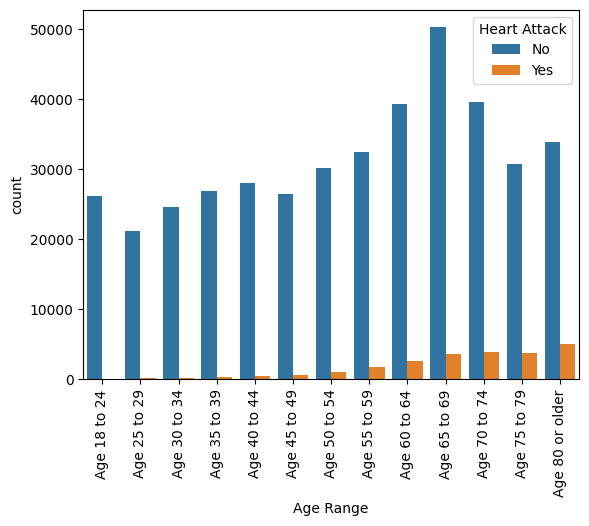

In [12]:
age_range_order = ["Age 18 to 24", "Age 25 to 29", "Age 30 to 34", "Age 35 to 39", "Age 40 to 44", "Age 45 to 49", "Age 50 to 54", "Age 55 to 59", "Age 60 to 64", "Age 65 to 69", "Age 70 to 74", "Age 75 to 79", "Age 80 or older"]
df["Age Range"].value_counts()
g = sns.countplot(x='Age Range', hue=target, order=age_range_order ,data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title

General Health
Good         145471
Very good    142115
Excellent     63410
Fair          61955
Poor          20372
Name: count, dtype: int64

[Text(0, 0, 'Poor'),
 Text(1, 0, 'Fair'),
 Text(2, 0, 'Good'),
 Text(3, 0, 'Very good'),
 Text(4, 0, 'Excellent')]

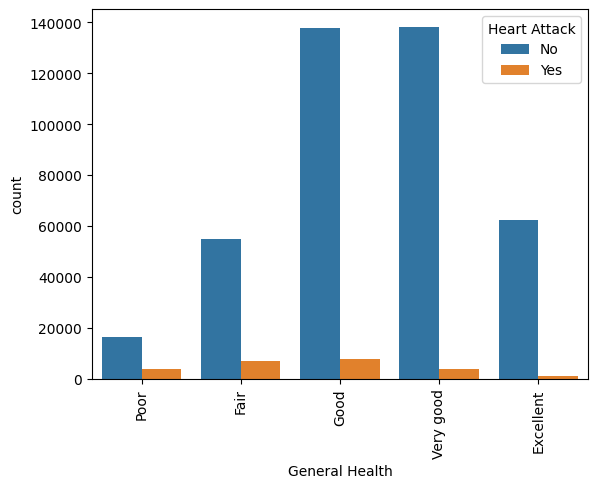

In [13]:
general_health_order = ["Poor", "Fair", "Good", "Very good", "Excellent"]
df["General Health"].value_counts()
g = sns.countplot(x='General Health', hue=target, order=general_health_order ,data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

E-cigarettes Frequency
Never            341947
Not Right Now     69110
Some days         11164
Everyday          11102
Name: count, dtype: int64

[Text(0, 0, 'Never'),
 Text(1, 0, 'Not Right Now'),
 Text(2, 0, 'Some days'),
 Text(3, 0, 'Everyday')]

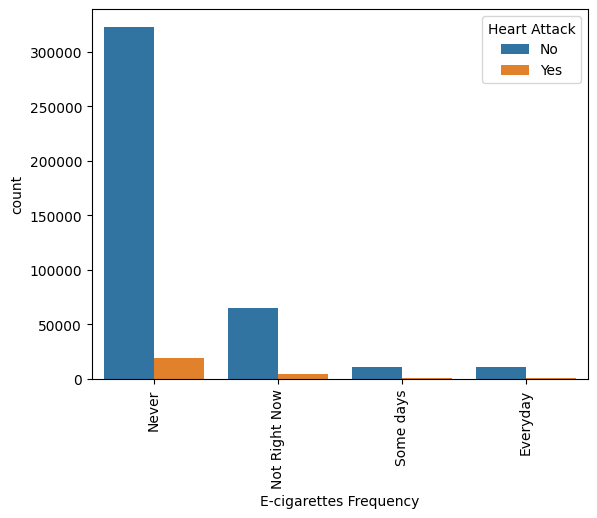

In [14]:
E_cigarettes_frequency_order = ["Never", "Not Right Now", "Some days", "Everyday"]
df["E-cigarettes Frequency"].value_counts()
g = sns.countplot(x='E-cigarettes Frequency', hue=target, order=E_cigarettes_frequency_order ,data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Smokeless Tobacco Products
Not at all    421510
Every day       6951
Some days       4862
Name: count, dtype: int64

[Text(0, 0, 'Not at all'), Text(1, 0, 'Some days'), Text(2, 0, 'Every day')]

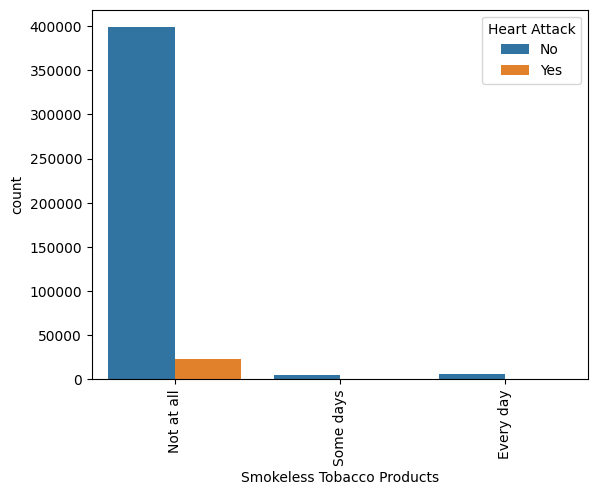

In [15]:
smokeless_tobacco_order = ["Not at all", "Some days", "Every day"]
df["Smokeless Tobacco Products"].value_counts()
g = sns.countplot(x='Smokeless Tobacco Products', hue=target, order=smokeless_tobacco_order ,data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


BMI_Category
Overweight         198192
Normal Weight      113969
Obese Class I       77244
Obese Class II      32985
Underweight          6521
Obese Class III      4412
Name: count, dtype: int64

[Text(0, 0, 'Underweight'),
 Text(1, 0, 'Normal Weight'),
 Text(2, 0, 'Overweight'),
 Text(3, 0, 'Obese Class I'),
 Text(4, 0, 'Obese Class II'),
 Text(5, 0, 'Obese Class III')]

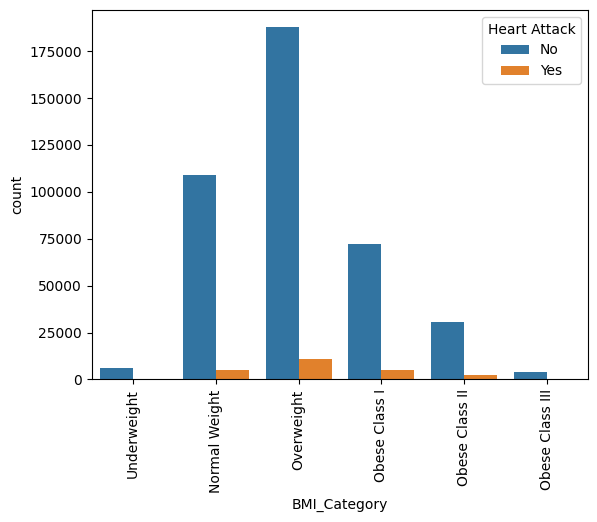

In [16]:
# Categories BMI
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels_order = ["Underweight", "Normal Weight", "Overweight", "Obese Class I", "Obese Class II", "Obese Class III"]
# Apply binning
df["BMI_Category"] = pd.cut(df["BMI"], bins=bmi_bins, labels=bmi_labels_order)

df["BMI_Category"].value_counts()
g = sns.countplot(x='BMI_Category', hue=target, order=bmi_labels_order ,data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [17]:
df[target].value_counts()

Heart Attack
No     409872
Yes     23451
Name: count, dtype: int64

### Encode the data (Category feature)

In [18]:
ordinal_categories = [age_range_order, general_health_order, E_cigarettes_frequency_order, smokeless_tobacco_order, bmi_labels_order]
ordinal_features = ["Age Range", "General Health", "E-cigarettes Frequency", "Smokeless Tobacco Products", "BMI_Category"]

ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])
df[ordinal_features] = df[ordinal_features].astype(int)

save_model(OrdinalEncoder, "Ordinal_Encoder.pkl")

df.head()

Model saved successfully as Model/Ordinal_Encoder.pkl


,Gender,Age,Age Range,Heart Attack,Angina or Coronary Heart Disease,Stroke,High Blood Pressure,Cholesterol Is High,Taking medicine for high cholesterol,Diabetes,Kidney Disease,Arthritis,General Health,Number of Days Physical Health Not Good,Number of Days Mental Health Not Good,Exercise in Past 30 Days,Physical activities frequence,Smoked at Least 100 Cigarettes,Smokeless Tobacco Products,E-cigarettes Frequency,Days in past 30 had alcoholic beverage,Weight in Pounds,Reported Height in Feet,BMI,BMI_Category
0,Female,80,12,No,No,No,Yes,No,No,Yes,No,No,3,30,30,No,0,No,0,0,0,172.0,5.250000,30.47,3
1,Female,80,12,No,No,No,Yes,Yes,Yes,No,No,Yes,3,30,30,Yes,0,No,0,0,0,132.0,4.750000,28.56,2
2,Female,80,12,No,No,No,Yes,Yes,Yes,No,No,Yes,1,6,2,Yes,5,Yes,0,0,0,130.0,5.333333,22.31,1
3,Female,78,11,No,No,No,No,No,No,No,No,Yes,3,2,30,Yes,0,No,0,0,0,170.0,5.500000,27.44,2
4,Female,76,11,No,No,No,Yes,No,No,Yes,No,Yes,1,30,30,Yes,0,No,1,0,2,170.0,5.666667,25.85,2


In [19]:
binary_features = ["Gender", "High Blood Pressure", "Kidney Disease", "Taking medicine for high cholesterol", "Angina or Coronary Heart Disease", 
                   "Heart Attack", "Stroke", "Diabetes", "Arthritis", "Smoked at Least 100 Cigarettes", "Cholesterol Is High", "Exercise in Past 30 Days"]

label_encoder = LabelEncoder()
for features in binary_features:
    df[features] = label_encoder.fit_transform(df[features])

save_model(LabelEncoder, "Label_Encoder.pkl")


df.head()

Model saved successfully as Model/Label_Encoder.pkl


,Gender,Age,Age Range,Heart Attack,Angina or Coronary Heart Disease,Stroke,High Blood Pressure,Cholesterol Is High,Taking medicine for high cholesterol,Diabetes,Kidney Disease,Arthritis,General Health,Number of Days Physical Health Not Good,Number of Days Mental Health Not Good,Exercise in Past 30 Days,Physical activities frequence,Smoked at Least 100 Cigarettes,Smokeless Tobacco Products,E-cigarettes Frequency,Days in past 30 had alcoholic beverage,Weight in Pounds,Reported Height in Feet,BMI,BMI_Category
0,0,80,12,0,0,0,1,0,0,1,0,0,3,30,30,0,0,0,0,0,0,172.0,5.250000,30.47,3
1,0,80,12,0,0,0,1,1,1,0,0,1,3,30,30,1,0,0,0,0,0,132.0,4.750000,28.56,2
2,0,80,12,0,0,0,1,1,1,0,0,1,1,6,2,1,5,1,0,0,0,130.0,5.333333,22.31,1
3,0,78,11,0,0,0,0,0,0,0,0,1,3,2,30,1,0,0,0,0,0,170.0,5.500000,27.44,2
4,0,76,11,0,0,0,1,0,0,1,0,1,1,30,30,1,0,0,1,0,2,170.0,5.666667,25.85,2


|Age Range|Label|
|---------|-----|
|Age 18 to 24|0|
|Age 25 to 29|1|
|Age 30 to 34|2|
|Age 35 to 39|3|
|Age 40 to 44|4|
|Age 45 to 49|5|
|Age 50 to 54|6|
|Age 55 to 59|7|
|Age 60 to 64|8|
|Age 65 to 69|9|
|Age 70 to 74|10|
|Age 75 to 79|11|
|Age 80 or older|12|

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Age Group', ylabel='Heart Attack Percentage'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

Text(0.5, 1.0, 'Heart Attack Percentage by Age Group')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Heart Attack Percentage (%)')

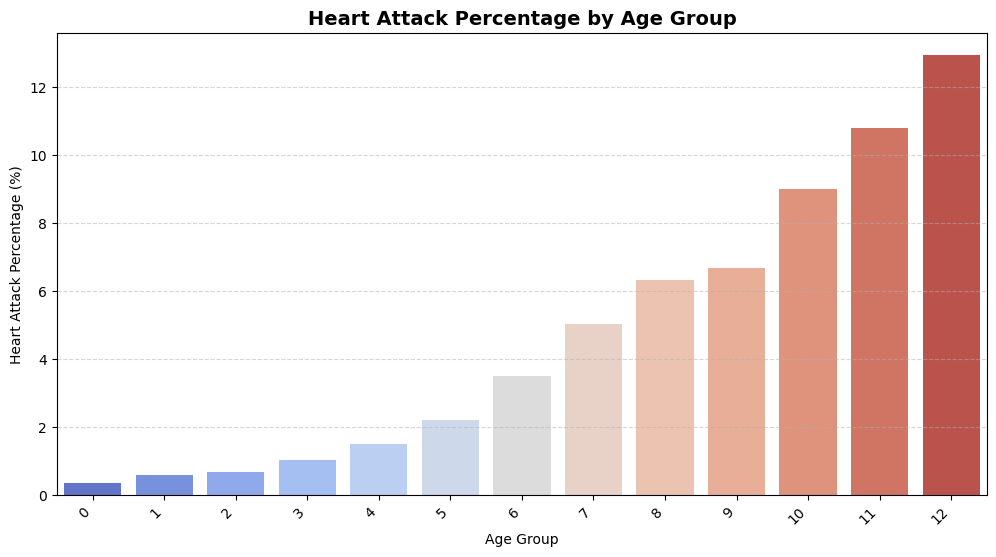

In [20]:
# Ensure the column names are correctly mapped
age_feature = "Age Range"
bmi_feature = "BMI"

# Check if required columns exist in the dataset
if {target, age_feature, bmi_feature}.issubset(df.columns):
    # Group by Age Group and calculate heart attack percentage
    heart_attack_percentage = df.groupby(age_feature)[target].mean() * 100

    # Convert to DataFrame
    heart_attack_percentage = heart_attack_percentage.reset_index()
    heart_attack_percentage.columns = ["Age Group", "Heart Attack Percentage"]

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Age Group", y="Heart Attack Percentage", data=heart_attack_percentage, palette="coolwarm")

    # Add labels
    plt.xticks(rotation=45, ha="right")
    plt.title("Heart Attack Percentage by Age Group", fontsize=14, weight="bold")
    plt.xlabel("Age Group")
    plt.ylabel("Heart Attack Percentage (%)")
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # Show plot
    plt.show()

|Category|BMI Range|Label|
|--------|---------|-----|
|Underweight|< 18.5|0|
|Normal Weight|18.5 - 24.9|1|
|Overweight|25 - 29.9|2|
|Obese Class I|30 - 34.9|3|
|Obese Class II|35 - 39.9|4|
|Obese Class III|≥ 40|5|

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='BMI_Category', ylabel='Heart Attack Percentage'>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

Text(0.5, 1.0, 'Heart Attack Percentage by BMI_Category')

Text(0.5, 0, 'BMI_Category')

Text(0, 0.5, 'Heart Attack Percentage (%)')

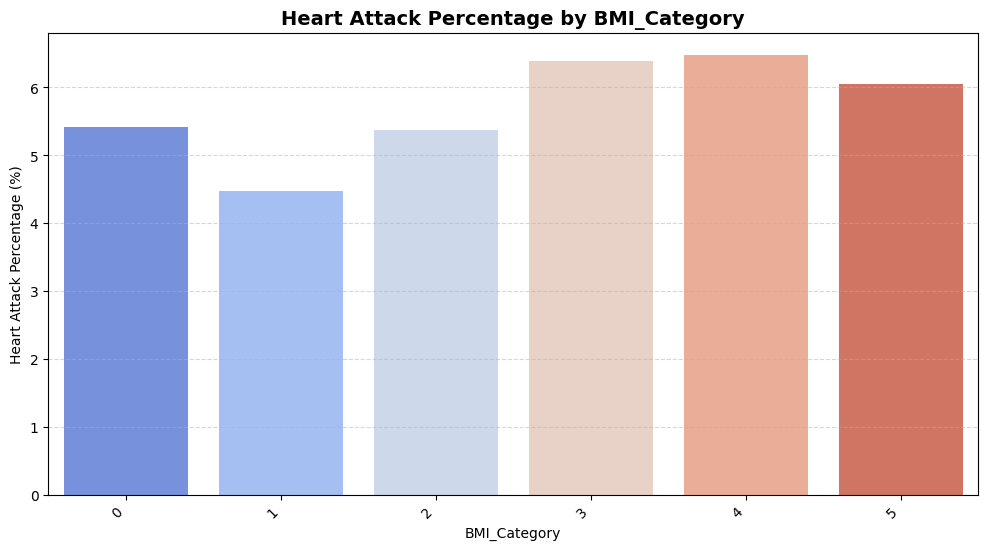

In [21]:
# Ensure the column names are correctly mapped
age_feature = "Age Range"
bmi_feature = "BMI_Category"

# Check if required columns exist in the dataset
if {target, age_feature, bmi_feature}.issubset(df.columns):
    # Group by Age Group and calculate heart attack percentage
    heart_attack_percentage = df.groupby(bmi_feature)[target].mean() * 100

    # Convert to DataFrame
    heart_attack_percentage = heart_attack_percentage.reset_index()
    heart_attack_percentage.columns = ["BMI_Category", "Heart Attack Percentage"]

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x="BMI_Category", y="Heart Attack Percentage", data=heart_attack_percentage, palette="coolwarm")

    # Add labels
    plt.xticks(rotation=45, ha="right")
    plt.title("Heart Attack Percentage by BMI_Category", fontsize=14, weight="bold")
    plt.xlabel("BMI_Category")
    plt.ylabel("Heart Attack Percentage (%)")
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # Show plot
    plt.show()

In [22]:
def summarize_correlations(corr_matrix):
    summary = {
        "Very Strong": [],
        "Strong": [],
        "Moderate": [],
        "Weak": [],
        "Very Weak/No Correlation": []
    }

    for col in corr_matrix.columns:
        for idx in corr_matrix.index:
            if col != idx:  # Avoid self-correlation
                value = corr_matrix.loc[idx, col]
                if abs(value) >= 0.9:
                    summary["Very Strong"].append((idx, col, value))
                elif abs(value) >= 0.7:
                    summary["Strong"].append((idx, col, value))
                elif abs(value) >= 0.5:
                    summary["Moderate"].append((idx, col, value))
                elif abs(value) >= 0.3:
                    summary["Weak"].append((idx, col, value))
                else:
                    summary["Very Weak/No Correlation"].append((idx, col, value))

    return summary

In [23]:
df[numeric_feature].corr()

,Age,Number of Days Physical Health Not Good,Number of Days Mental Health Not Good,Physical activities frequence,Days in past 30 had alcoholic beverage,Weight in Pounds,Reported Height in Feet,BMI
Age,1.000000,0.082151,0.222881,-0.023529,-0.107498,-0.038449,-0.113487,0.016907
Number of Days Physical Health Not Good,0.082151,1.000000,0.200801,0.029651,-0.016337,-0.020642,0.019910,-0.031092
Number of Days Mental Health Not Good,0.222881,0.200801,1.000000,0.019558,-0.056284,0.017442,0.029977,0.009184
Physical activities frequence,-0.023529,0.029651,0.019558,1.000000,0.035075,-0.055993,0.063655,-0.101488
Days in past 30 had alcoholic beverage,-0.107498,-0.016337,-0.056284,0.035075,1.000000,0.015870,0.103784,-0.035462
Weight in Pounds,-0.038449,-0.020642,0.017442,-0.055993,0.015870,1.000000,0.461292,0.753435
Reported Height in Feet,-0.113487,0.019910,0.029977,0.063655,0.103784,0.461292,1.000000,0.021366
BMI,0.016907,-0.031092,0.009184,-0.101488,-0.035462,0.753435,0.021366,1.000000


<Axes: >


Very Strong Correlations:
Age Range - Age: 0.99
Age - Age Range: 0.99
BMI_Category - BMI: 0.95
BMI - BMI_Category: 0.95

Strong Correlations:
BMI - Weight in Pounds: 0.75
BMI_Category - Weight in Pounds: 0.71
Weight in Pounds - BMI: 0.75
Weight in Pounds - BMI_Category: 0.71

Moderate Correlations:
Reported Height in Feet - Gender: 0.68
Taking medicine for high cholesterol - Cholesterol Is High: 0.60
Cholesterol Is High - Taking medicine for high cholesterol: 0.60
Gender - Reported Height in Feet: 0.68

Weak Correlations:
Weight in Pounds - Gender: 0.35
High Blood Pressure - Age: 0.37
Cholesterol Is High - Age: 0.32
Taking medicine for high cholesterol - Age: 0.42
Arthritis - Age: 0.39
High Blood Pressure - Age Range: 0.36
Cholesterol Is High - Age Range: 0.31
Taking medicine for high cholesterol - Age Range: 0.42
Arthritis - Age Range: 0.38
Angina or Coronary Heart Disease - Heart Attack: 0.42
Heart Attack - Angina or Coronary Heart Disease: 0.42
Age - High Blood Pressure: 0.37
Age R

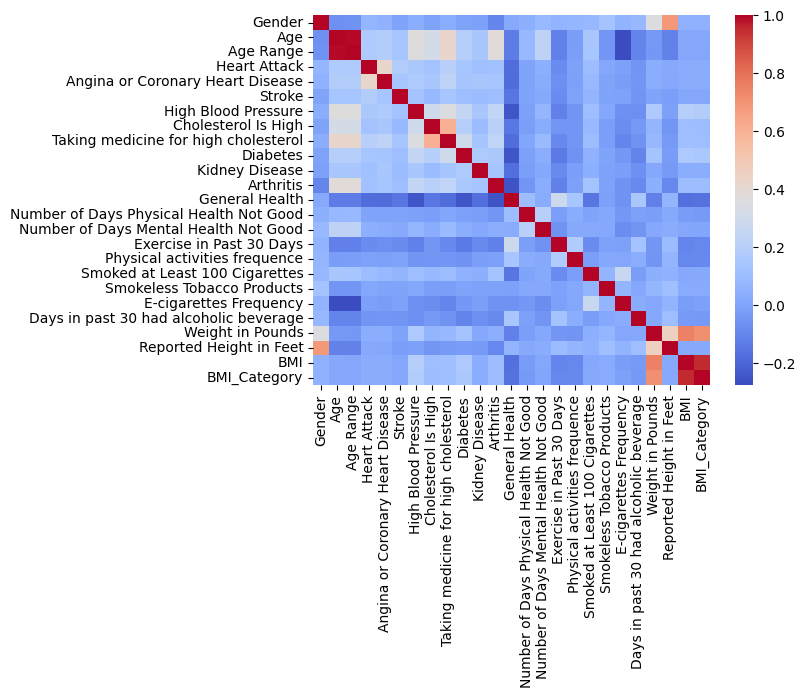

In [24]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
correlation_summary = summarize_correlations(correlation_matrix)

for category, correlations in correlation_summary.items():
    print(f"\n{category} Correlations:")
    for feature1, feature2, value in correlations:
        print(f"{feature1} - {feature2}: {value:.2f}")


#### Dropping Redundance feature
- **Age**
- **Weight in Pounds**	
- **Reported Height in Feet**
- **BMI**


In [25]:
df = df.drop(columns=["Age", "Weight in Pounds", "Reported Height in Feet", "BMI"])
df.head()

,Gender,Age Range,Heart Attack,Angina or Coronary Heart Disease,Stroke,High Blood Pressure,Cholesterol Is High,Taking medicine for high cholesterol,Diabetes,Kidney Disease,Arthritis,General Health,Number of Days Physical Health Not Good,Number of Days Mental Health Not Good,Exercise in Past 30 Days,Physical activities frequence,Smoked at Least 100 Cigarettes,Smokeless Tobacco Products,E-cigarettes Frequency,Days in past 30 had alcoholic beverage,BMI_Category
0,0,12,0,0,0,1,0,0,1,0,0,3,30,30,0,0,0,0,0,0,3
1,0,12,0,0,0,1,1,1,0,0,1,3,30,30,1,0,0,0,0,0,2
2,0,12,0,0,0,1,1,1,0,0,1,1,6,2,1,5,1,0,0,0,1
3,0,11,0,0,0,0,0,0,0,0,1,3,2,30,1,0,0,0,0,0,2
4,0,11,0,0,0,1,0,0,1,0,1,1,30,30,1,0,0,1,0,2,2


In [26]:
df.to_csv('Modified Data/ML_ready.csv', index=False)

### Undersampling

In [27]:
# df_resampled = under_sampling(df, target)

# correlation_matrix = df_resampled.corr()
# sns.heatmap(correlation_matrix, cmap='coolwarm')

In [28]:
# draw_pie_plot(category_feature, df_resampled)

In [29]:
# draw_density_plot(numeric_feature.copy(), "Heart Attack", df_resampled)

In [30]:
# df_resampled.info()

#### Visualization

### Creating New Features

##### Categories BMI
Categories BMI follow by BMI range (https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-management/body-mass-index-bmi/#:~:text=BMI%20ranges&text=under%2018.5%20%E2%80%93%20This%20is%20described,This%20is%20described%20as%20obesity)
|Category|BMI Range|
|--------|---------|
|Underweight|< 18.5|
|Normal Weight|18.5 - 24.9|
|Overweight|25 - 29.9|
|Obese Class I|30 - 34.9|
|Obese Class II|35 - 39.9|
|Obese Class III|≥ 40|

In [31]:
# # Categories BMI
# bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
# bmi_labels = ["Underweight", "Normal Weight", "Overweight", "Obese Class I", "Obese Class II", "Obese Class III"]
# # Apply binning
# df["BMI_Category"] = pd.cut(df["BMI"], bins=bmi_bins, labels=bmi_labels)

# df.head()

In [32]:
# # Ensure the column names are correctly mapped
# bmi_feature = "BMI_Category"

# # Check if required columns exist in the dataset
# if {target, age_feature, bmi_feature}.issubset(df.columns):
#     # Group by Age Group and calculate heart attack percentage
#     heart_attack_percentage = df.groupby(bmi_feature)[target].mean() * 100

#     # Convert to DataFrame
#     heart_attack_percentage = heart_attack_percentage.reset_index()
#     heart_attack_percentage.columns = [bmi_feature, "Heart Attack Percentage"]

#     # Plot bar chart
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x=bmi_feature, y="Heart Attack Percentage", data=heart_attack_percentage, palette="coolwarm")

#     # Add labels
#     plt.xticks(rotation=45, ha="right")
#     plt.title("Heart Attack Percentage by Age Group", fontsize=14, weight="bold")
#     plt.xlabel(bmi_feature)
#     plt.ylabel("Heart Attack Percentage (%)")
#     plt.grid(axis="y", linestyle="--", alpha=0.5)

#     # Show plot
#     plt.show()

In [33]:
# df["Age_BMI"] = df["Age"] * df["BMI"]  # Interaction between age and BMI
# df["Exercise_BMI"] = df["Exercise in Past 30 Days"] * df["BMI"]  # Effect of exercise on BMI
# df["Alcohol_Smoking"] = df["Days in past 30 had alcoholic beverage"] * df["Smoked at Least 100 Cigarettes"]  # Relationship between drinking and smoking

In [34]:
# df["Health_Risk_Score"] = df[["High Blood Pressure", "Diabetes", "Taking medicine for high cholesterol", "Stroke"]].sum(axis=1)

In [35]:
# df.head()

In [36]:
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, cmap='coolwarm')
# correlation_summary = summarize_correlations(correlation_matrix)

# for category, correlations in correlation_summary.items():
#     print(f"\n{category} Correlations:")
#     for feature1, feature2, value in correlations:
#         print(f"{feature1} - {feature2}: {value:.2f}")

In [37]:
# # From https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# # Code source: Jaques Grobler
# # License: BSD 3 clause

# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# from sklearn import datasets, linear_model
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler

# target = "Heart Attack"
# X = df.drop(columns=[target])
# y = df[target]

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# # Scale the data using StandardScaler
# scaler = StandardScaler()
# diabetes_X_train = scaler.fit_transform(X_train)
# diabetes_X_test = scaler.transform(X_test)

# ####################################################################
# # Quick Helper Method - Find Best Parameters
# # Define parameter grid
# param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
 
# # Perform grid search with cross-validation
# lasso_cv = GridSearchCV(linear_model.Lasso(), param_grid, cv=5)
# lasso_cv.fit(X_train, y_train)
 
# # Print best parameter values and score
# print("Best Parameters:", lasso_cv.best_params_)
# print("Best Score:", lasso_cv.best_score_)
# ####################################################################

# # Fit Lasso regression model
# lasso = linear_model.Lasso(alpha=1)
# lasso.fit(X_train, y_train)
 
# # Evaluate model performance on test set
# y_pred = lasso.predict(X_test)

# # The coefficients
# print("Coefficients: \n", lasso.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % lasso.score(X_test, y_test))

In [38]:
# from sklearn.cluster import KMeans

# # Run K-Means for different K values
# inertia = []
# K_values = range(2, 11)  # Testing from 2 to 10 clusters

# for k in K_values:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     kmeans.fit(df)  # df_processed = Preprocessed dataset
#     inertia.append(kmeans.inertia_)

# # Plot the Elbow Curve
# plt.plot(K_values, inertia, marker='o')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal K')
# plt.show()

In [39]:
# from kneed import KneeLocator

# knee_locator = KneeLocator(range(2, 11), inertia, curve="convex", direction="decreasing")
# optimal_k = knee_locator.knee

# print(f"Optimal number of clusters: {optimal_k}")

In [40]:
# kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# df["Cluster"] = kmeans.fit_predict(df)

# # Check cluster distribution
# df["Cluster"].value_counts()

In [41]:
# # Visualize clusters based on important features
# sns.boxplot(x="Cluster", y="BMI", data=df)
# plt.title("BMI Distribution Across Clusters")
# plt.show()

# sns.boxplot(x="Cluster", y="Age", data=df)
# plt.title("Age Distribution Across Clusters")
# plt.show()

In [42]:
# # Reduce to 2D using PCA for visualization
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(df)
# df["PCA1"] = reduced_features[:, 0]
# df["PCA2"] = reduced_features[:, 1]

# # Plot clusters with colors
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="tab10", alpha=0.7)
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("K-Means Clustering Visualization (PCA Reduced)")
# plt.legend(title="Cluster")
# plt.show()

In [43]:
# target = "Heart Attack"
# X = df.drop(columns=[target])
# y = df[target]

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


In [44]:
# from sklearn.decomposition import TruncatedSVD


# # Apply SVD for dimensionality reduction
# num_components = 10  # Adjust based on explained variance
# svd = TruncatedSVD(n_components=num_components)
# X_svd = svd.fit_transform(X_scaled)

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

# # # Choose the number of components (dimensions)
# # num_components = 2  # Reduce data to 2D for visualization

# # svd = TruncatedSVD(n_components=num_components)
# # X_svd = svd.fit_transform(df)

# # # Explained variance ratio
# # explained_variance = np.cumsum(svd.explained_variance_ratio_)

# # # Plot explained variance to decide on the number of components
# # plt.plot(range(1, num_components + 1), explained_variance, marker="o")
# # plt.xlabel("Number of Components")
# # plt.ylabel("Explained Variance")
# # plt.title("Explained Variance vs. Number of SVD Components")
# # plt.show()


In [45]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# # Train Logistic Regression
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

# # Predict
# y_pred = log_reg.predict(X_test)

# # Evaluate
# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [46]:
# from sklearn.svm import SVC

# # Train SVM
# svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
# svm_model.fit(X_train, y_train)

# # Predict
# y_pred_svm = svm_model.predict(X_test)

# # Evaluate
# print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
# print(classification_report(y_test, y_pred_svm))

In [47]:
# from sklearn.ensemble import RandomForestClassifier

# # Train Random Forest
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Predict
# y_pred_rf = rf_model.predict(X_test)

# # Evaluate
# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
# print(classification_report(y_test, y_pred_rf))

In [48]:
# import numpy as np
# feature_importance = np.abs(svd.components_).sum(axis=0)
# sorted_features = np.argsort(-feature_importance)

# print("Top SVD Components Contributing to Heart Attack Risk:")
# print(sorted_features[:5])  # Show top 5 important features

In [49]:
# from sklearn.cluster import KMeans

# # Determine optimal K using the Elbow Method
# inertia = []
# K_values = range(2, 11)

# for k in K_values:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     kmeans.fit(X_svd)
#     inertia.append(kmeans.inertia_)

# # Plot the Elbow Curve
# plt.plot(K_values, inertia, marker="o")
# plt.xlabel("Number of Clusters (K)")
# plt.ylabel("Inertia")
# plt.title("Elbow Method for Optimal K (After SVD)")
# plt.show()

# # Choose optimal K and apply K-Means
# optimal_k = 4  # Example choice based on elbow point
# kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# clusters = kmeans.fit_predict(X_svd)

# # Add cluster labels to the dataset
# df["Cluster_SVD"] = clusters


In [50]:
# plt.scatter(X_svd[:, 0], X_svd[:, 1], c=clusters, cmap="coolwarm", edgecolors="k", alpha=0.7)
# plt.xlabel("SVD Component 1")
# plt.ylabel("SVD Component 2")
# plt.title("Clusters After SVD Reduction")
# plt.colorbar(label="Cluster")
# plt.show()